Dataset: [The IQ-OTH/NCCD lung cancer dataset](https://www.kaggle.com/datasets/hamdallak/the-iqothnccd-lung-cancer-dataset)

About Dataset:
The Iraq-Oncology Teaching Hospital/National Center for Cancer Diseases (IQ-OTH/NCCD) lung cancer dataset was collected in the above-mentioned specialist hospitals over a period of three months in fall 2019. It includes CT scans of patients diagnosed with lung cancer in different stages, as well as healthy subjects. IQ-OTH/NCCD slides were marked by oncologists and radiologists in these two centers. The dataset contains a total of 1190 images representing CT scan slices of 110 cases. These cases are grouped into three classes: normal, benign, and malignant. of these, 40 cases are diagnosed as malignant; 15 cases diagnosed with benign; and 55 cases classified as normal cases. The CT scans were originally collected in DICOM format. The scanner used is SOMATOM from Siemens. CT protocol includes: 120 kV, slice thickness of 1 mm, with window width ranging from 350 to 1200 HU and window center from 50 to 600 were used for reading. with breath hold at full inspiration. All images were de-identified before performing analysis. Written consent was waived by the oversight review board. The study was approved by the institutional review board of participating medical centers. Each scan contains several slices. The number of these slices range from 80 to 200 slices, each of them represents an image of the human chest with different sides and angles. The 110 cases vary in gender, age, educational attainment, area of residence and living status. Some of them are employees of the Iraqi ministries of Transport and Oil, others are farmers and gainers. Most of them come from places in the middle region of Iraq, particularly, the provinces of Baghdad, Wasit, Diyala, Salahuddin, and Babylon.

if you use this dataset you should cite the following articles:

1. Diagnosis of lung cancer based on CT scans using CNN
can be cited as :
(H. F. Al-Yasriy, M. S. Al-Husieny, F. Y. Mohsen, E. A. Khalil, and Z. S. Hassan, "Diagnosis of Lung Cancer Based on CT Scans Using CNN," IOP Conference Series: Materials Science and Engineering, vol. 928, 2020.)

2. Evaluation of SVM performance in the detection of lung cancer in marked CT scan dataset
can be cited as:
(H. F. Kareem, M. S. A.-Husieny, F. Y. Mohsen, E. A. Khalil, and Z. S. Hassan, “Evaluation of SVM performance in the detection
of lung cancer in marked CT scan dataset,” Indonesian Journal of Electrical Engineering and Computer Science, vol. 21, no. 3,
pp. 1731-1738, 2021, doi: 10.11591/ijeecs.v21.i3.pp1731-1738.)

3. The IQ-OTH/NCCD lung cancer dataset
can be cited as :
(alyasriy, hamdalla; AL-Huseiny, Muayed (2023), “The IQ-OTH/NCCD lung cancer dataset”, Mendeley Data, V4, doi: 10.17632/bhmdr45bh2.4)

Import required libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Categories

In [2]:
base_path = './The IQ-OTHNCCD lung cancer dataset/'
categories = os.listdir(base_path)
print(categories)

['Bengin cases', 'Malignant cases', 'Normal cases']


Loading and Visualizing Data

In [3]:
def load_images_from_folder(folder, num_images=None):
    images = [] # list to store images
    if num_images is not None: # if num_images is not None, randomly select num_images images.
        indices = np.random.permutation(len(os.listdir(folder)))[:num_images]
    else: # if num_images is None, load all images randomly.
        indices = np.random.permutation(len(os.listdir(folder)))
    filenames = np.array(os.listdir(folder))[indices] # get all files in the folder
    for filename in filenames:
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

In [4]:
images = {}
for category in categories: # load images for each category
    images[category] = load_images_from_folder(os.path.join(base_path, category)) 

In [5]:
def show_images(images, titles=None):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for i, img in enumerate(images):
        axes[i].imshow(img, cmap="gray")
        axes[i].axis("off")
        if titles:
            axes[i].set_title(titles[i])
    plt.show()

Sample images from Bengin cases category


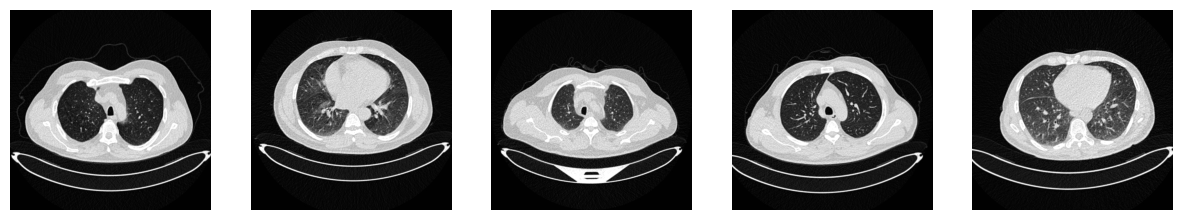

Sample images from Malignant cases category


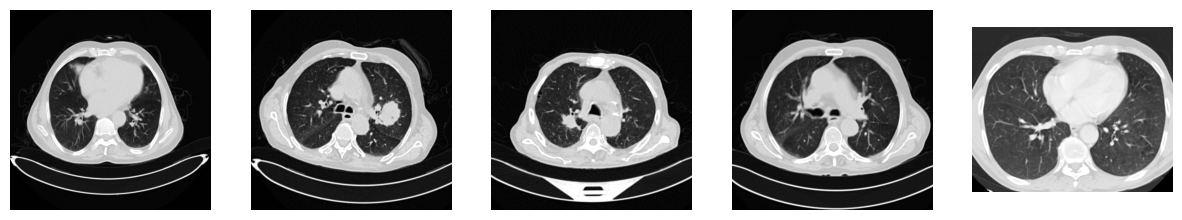

Sample images from Normal cases category


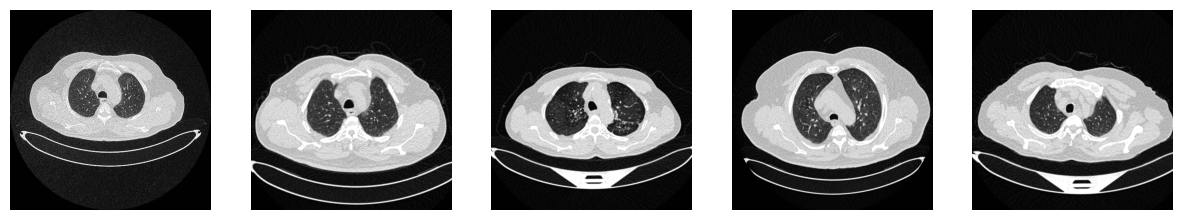

In [6]:
# Visualize a few images from each category
for category in categories:
    print(f"Sample images from {category} category")
    show_images(images[category][:5])

Class Distribution

                 count
Bengin cases       120
Malignant cases    561
Normal cases       416
total number of images: 1097


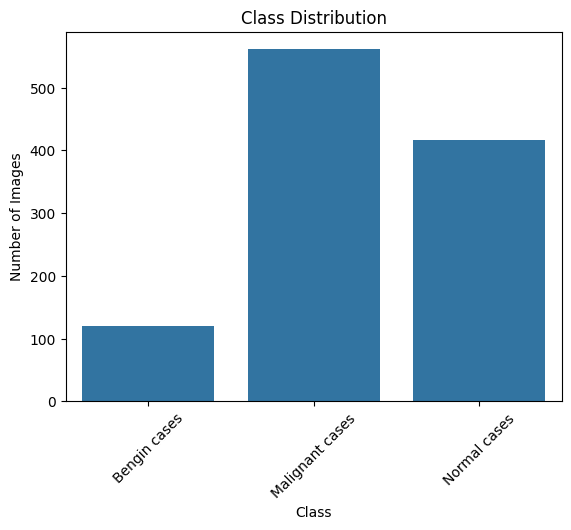

In [7]:
# Count number of images in each category
class_distribution = {}
for category in categories:
    class_distribution[category] = len(images[category])

# Create a DataFrame from the class distribution
class_distribution = pd.DataFrame(class_distribution.values(), index=class_distribution.keys(), columns=['count'])

# Plot the class distribution
print(class_distribution)
print(f"total number of images: {class_distribution['count'].sum()}")
sns.barplot(x=class_distribution.index, y=class_distribution['count'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

Image Shape  

In [8]:
# Shape distribution of images in each category
def get_shape_distribution():
    shape_distribution = {}
    for category in categories:
        for img in images[category]:
            shape = img.shape
            if shape in shape_distribution:
                shape_distribution[shape] += 1
            else:
                shape_distribution[shape] = 1
    return shape_distribution

shape_distribution = get_shape_distribution()
print(shape_distribution)

{(512, 512): 1036, (512, 623): 31, (512, 801): 28, (404, 511): 1, (331, 506): 1}


In [9]:
target_shape = sorted(shape_distribution.items(), key= lambda x: x[1], reverse=True)[0][0]
target_shape = np.array(target_shape)//4
print(f"Target shape: {target_shape}")

Target shape: [128 128]


In [10]:
# Resize all images to the target shape
for category in categories:
    for i, img in enumerate(images[category]):
        images[category][i] = cv2.resize(img, target_shape, cv2.INTER_AREA)

In [11]:
shape_distribution = get_shape_distribution()
print(shape_distribution)

{(128, 128): 1097}


In [12]:
for category in categories:
    images[category] = np.array(images[category])

Sample images from Bengin cases category


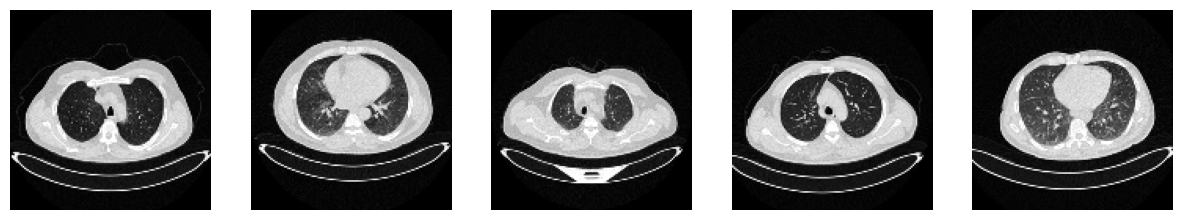

Sample images from Malignant cases category


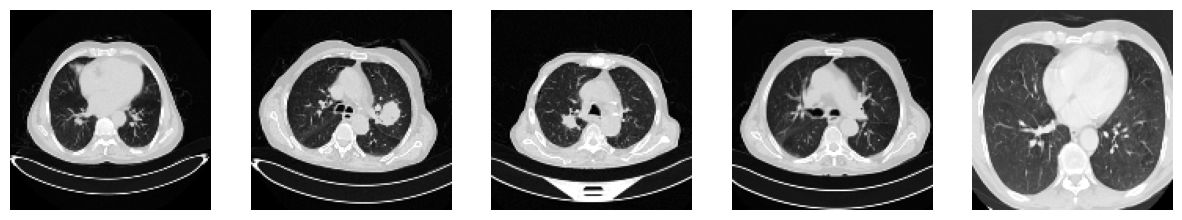

Sample images from Normal cases category


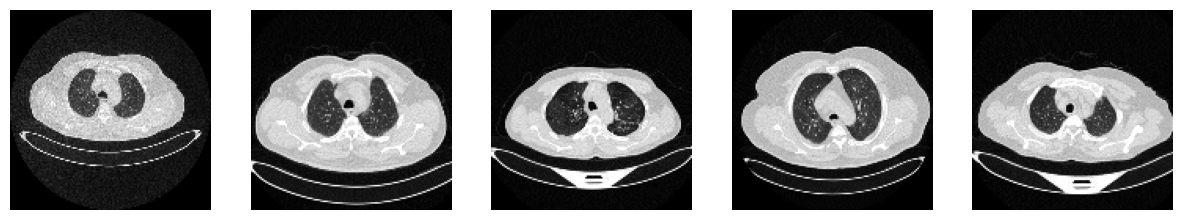

In [13]:
# Visualize a few images from each category after resizing
for image in images:
    print(f"Sample images from {image} category")
    show_images(images[image][:5])

Image statistics

In [14]:
# Image statistics for each category (mean, std, min, max, median, etc.)
for category in categories:
    img_data = images[category]
    print(f"Category: {category}")
    print(f"Mean: {np.mean(img_data):.2f}")
    print(f"Std: {np.std(img_data):.2f}")
    print(f"Min: {np.min(img_data)}")
    print(f"Max: {np.max(img_data)}")
    print(f"Median: {np.median(img_data)}")
    print(f"25th percentile: {np.percentile(img_data, 25)}")
    print(f"75th percentile: {np.percentile(img_data, 75)}")
    print()

Category: Bengin cases
Mean: 101.29
Std: 76.32
Min: 37
Max: 255
Median: 53.0
25th percentile: 43.0
75th percentile: 195.0

Category: Malignant cases
Mean: 106.01
Std: 77.31
Min: 0
Max: 255
Median: 58.0
25th percentile: 43.0
75th percentile: 198.0

Category: Normal cases
Mean: 103.63
Std: 75.29
Min: 37
Max: 255
Median: 59.0
25th percentile: 44.0
75th percentile: 195.0



Histograms of Pixel Intensities

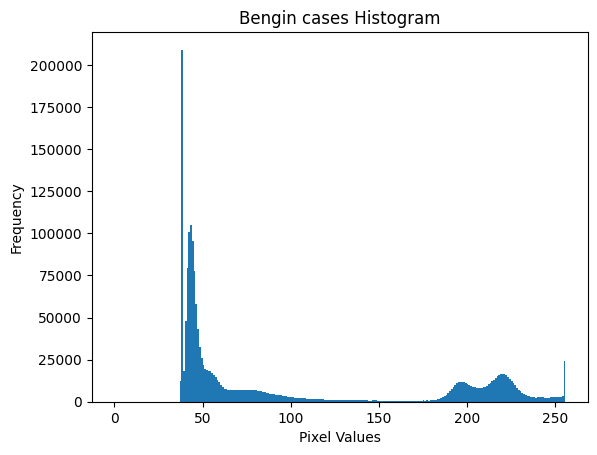

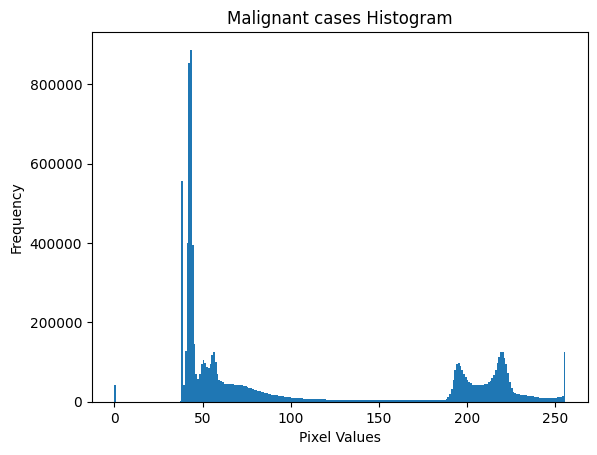

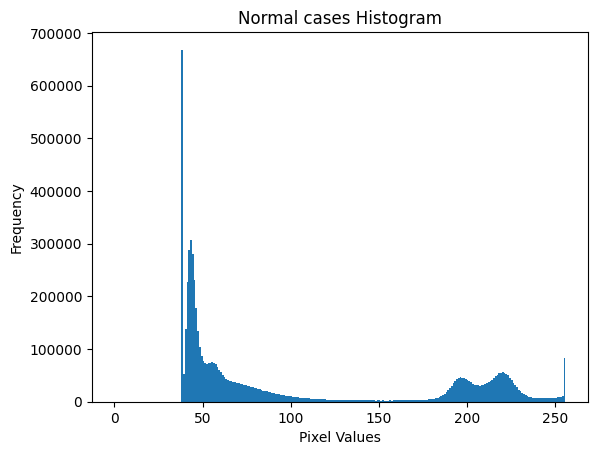

In [15]:
# Histograms of pixel values for each category
def plot_histogram(images, title):
    plt.hist(images.ravel(), bins=256, range=(0, 256))
    plt.title(title)
    plt.xlabel('Pixel Values')
    plt.ylabel('Frequency')
    plt.show()
    
for category in categories:
    img_data = images[category]
    plot_histogram(img_data, f"{category} Histogram")

In [16]:
# Train-Test split
from sklearn.model_selection import train_test_split

X = np.concatenate([images[category] for category in categories])
y = np.concatenate([[category]*len(images[category]) for category in categories])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [17]:
# Encoding the target variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [18]:
le.classes_

array(['Bengin cases', 'Malignant cases', 'Normal cases'], dtype='<U15')

In [68]:
# Normalizing the pixel values
X_train = X_train/255.0
X_test = X_test/255.0

In [91]:
# Reshaping the images
X_train = X_train.reshape(-1, *target_shape, 1)
X_test = X_test.reshape(-1, *target_shape, 1)

In [65]:
# Train a simple CNN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [86]:
(*target_shape, 1)

(128, 128, 1)

In [120]:
model = Sequential()

# Input layer
model.add(Input(shape=X_train.shape[1:]))
# Hidden layers
model.add(Conv2D(32, kernel_size=(5, 5), activation="relu", name="conv_1"))
model.add(MaxPooling2D(pool_size=(2, 2), name="pool_1"))
model.add(Conv2D(64, kernel_size=(5, 5), activation="relu", name="conv_2"))
model.add(MaxPooling2D(pool_size=(2, 2), name="pool_2"))
# Output layer
model.add(Flatten(name="flatten"))
model.add(Dense(3, activation="softmax", name="output"))

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                 │ (None, 124, 124, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 58, 58, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │       161,475 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,571 (834.26 KB)

 Trainable params: 213,571 (834.26 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
history = model.fit(
    X_train,
    y_train_encoded,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test_encoded),
)

Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 314ms/step - accuracy: 0.5017 - loss: 1.0114 - val_accuracy: 0.6727 - val_loss: 0.7853
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 337ms/step - accuracy: 0.6950 - loss: 0.7384 - val_accuracy: 0.7864 - val_loss: 0.5108
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 367ms/step - accuracy: 0.8166 - loss: 0.4499 - val_accuracy: 0.8955 - val_loss: 0.2738
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step - accuracy: 0.9367 - loss: 0.1823 - val_accuracy: 0.9182 - val_loss: 0.2020
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 340ms/step - accuracy: 0.9783 - loss: 0.0887 - val_accuracy: 0.9636 - val_loss: 0.1089
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 332ms/step - accuracy: 0.9948 - loss: 0.0482 - val_accuracy: 0.9545 - val_loss: 0.1086
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 329ms/step - accuracy: 0.9963 - loss: 0.0328 - val_accuracy: 0.9727 - val_loss: 0.0875
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 326ms/step - accuracy: 0.9955 - loss: 0.0220 - val_accuracy:

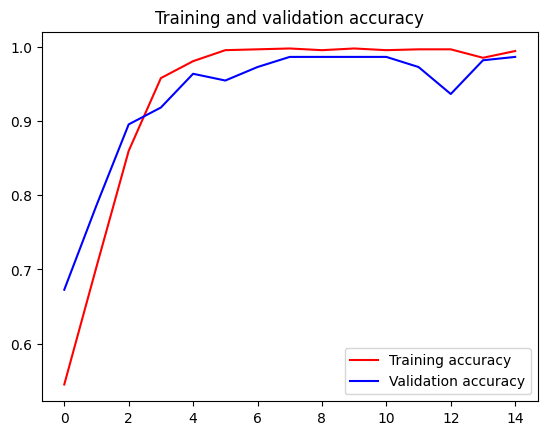

In [124]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

In [127]:
print("Model evaluation")
evaluate = model.evaluate(X_test, y_test_encoded)

Model evaluation
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9856 - loss: 0.0957


In [140]:
result = pd.DataFrame(
    {
        "actual": y_test,
        "predicted": le.inverse_transform(model.predict(X_test).argmax(axis=1)),
    }
)
result["correct"] = result["actual"] == result["predicted"]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [141]:
result

,actual,predicted,correct
0,Normal cases,Normal cases,True
1,Normal cases,Normal cases,True
2,Malignant cases,Malignant cases,True
3,Normal cases,Normal cases,True
4,Malignant cases,Malignant cases,True
...,...,...,...
215,Malignant cases,Malignant cases,True
216,Malignant cases,Malignant cases,True
217,Bengin cases,Bengin cases,True
218,Malignant cases,Malignant cases,True


In [142]:
result["correct"].value_counts()

correct
True     217
False      3
Name: count, dtype: int64

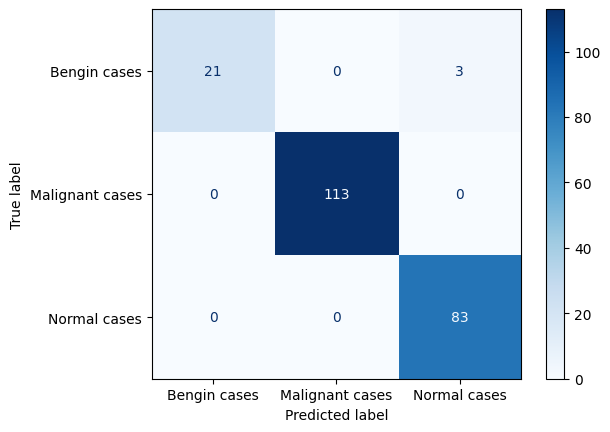

In [146]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(result["actual"], result["predicted"], labels=categories)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap="Blues")
plt.show()

In [147]:
# Save the model
model.save("lung_cancer_model.h5")
print("Model saved successfully!")

Model saved successfully!


In [ ]:
# # Load the model
# from tensorflow.keras.models import load_model

# model = load_model("lung_cancer_model.h5")